## Linear Algrbra 

In [2]:
import numpy as np
import polars as pl
import matplotlib.pyplot as plt
import os

for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))
        
for dirname, _, filenames in os.walk('/kaggle/working'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

## First loop 
1. ```os.walk('/kaggle/input')```:
   - ```os.walk()```is a method in Python's ```os``` module that generates the file names in a directory tree by walking either top-down or bottom-up through the directory structure 
   - ```'/kaggle/input'```is the starting directory. This is often used in <span style="color:blue">Kaggle </span> notebooks to reference the input data folder (where datasets are stored).
2. ```for dirname, _, filenames in os.walk('/kaggle/input')```:
   - This loop iterates over each directory and subdirectory in ```/kaggle/input```.
   - ```dirname```: The path of the current directory being traversed.
   - ```_```: The second variable is usually the list of subdirectories in ```dirname```, but it's not used in this case (hence the underscore as a convention for unused variables).
   - ```filenames```: A list of the files present in the current directory (```dirname```).
3. ```for filename in filenames```:
   - This inner loop iterates over the list of files (```filenames```) in the current directory (```dirname```).
4. ```os.path.join(dirname, filename)```:
   - ```os.path.join()``` is used to safely concatenate the ```dirname``` (directory path) and the ```filename``` to form a full file path. This ensures proper path formatting regardless of the operating system (e.g., Windows uses ```\```, whereas Unix-based systems like Linux use ```/```).
5.```print(os.path.join(dirname, filename))```:
   - This prints the complete file path for each file in the current directory (```/kaggle/input```).

## Second loop
This loop is almost identical to the first one, but it operates on the ```/kaggle/working``` directory instead of ```/kaggle/input```.
1. ```os.walk('/kaggle/working')```:
   - This traverses the directory structure starting from ```/kaggle/working```. This is typically where output files or code notebooks are stored during a Kaggle notebook run.
2. The remaining logic is the same:
   - It iterates over each directory and subdirectory, printing the full file path of each file in the ```/kaggle/working``` directory.

In [3]:
import os
import polars as pl

# Path to the folder containing the CSV files
folder_path = './data'

# List all CSV files in the folder
csv_files = [file for file in os.listdir(folder_path) if file.endswith('.csv')]

# Load all CSV files into a list of Polars DataFrames
dataframes = []
for csv_file in csv_files:
    file_path = os.path.join(folder_path, csv_file)
    df = pl.read_csv(file_path, has_header=False)  # Adjust has_header based on your file
    
    # Standardize column names and types
    df.columns = ['EventID', 'Timestamp', 'Time', 'Direction', 'Coord1', 'Coord2', 'Direction2', 'Coord3', 'Coord4']
    df = df.with_columns([
        pl.col('EventID').cast(pl.Int64),
        pl.col('Timestamp').cast(pl.Int64),
        pl.col('Time').cast(pl.Float64),
        pl.col('Direction').cast(pl.Utf8),
        pl.col('Coord1').cast(pl.Float64),
        pl.col('Coord2').cast(pl.Float64),
        pl.col('Direction2').cast(pl.Utf8),
        pl.col('Coord3').cast(pl.Float64),
        pl.col('Coord4').cast(pl.Float64),
    ])
    
    dataframes.append(df)

# Combine all DataFrames into one
combined_data = pl.concat(dataframes, how="vertical_relaxed")

# Sort the combined data by EventID
sorted_data = combined_data.sort("EventID")

# Print summary
print(f"Loaded {len(dataframes)} CSV files.")
print(f"Combined DataFrame shape: {sorted_data.shape}")

# Display the first few rows of the sorted DataFrame
print(sorted_data.head())

# Save sorted data if needed
sorted_data.write_csv('./sorted_combined_data.csv')


Loaded 1 CSV files.
Combined DataFrame shape: (2825, 9)
shape: (5, 9)
┌─────────┬──────────────┬──────────┬───────────┬───┬────────────┬────────────┬────────┬────────┐
│ EventID ┆ Timestamp    ┆ Time     ┆ Direction ┆ … ┆ Coord2     ┆ Direction2 ┆ Coord3 ┆ Coord4 │
│ ---     ┆ ---          ┆ ---      ┆ ---       ┆   ┆ ---        ┆ ---        ┆ ---    ┆ ---    │
│ i64     ┆ i64          ┆ f64      ┆ str       ┆   ┆ f64        ┆ str        ┆ f64    ┆ f64    │
╞═════════╪══════════════╪══════════╪═══════════╪═══╪════════════╪════════════╪════════╪════════╡
│ 798     ┆ 612442755544 ┆ 1.7322e9 ┆ 'Right'   ┆ … ┆ 236.659805 ┆ null       ┆ null   ┆ null   │
│ 799     ┆ 612442769653 ┆ 1.7322e9 ┆ 'Right'   ┆ … ┆ 238.599258 ┆ null       ┆ null   ┆ null   │
│ 800     ┆ 612442782525 ┆ 1.7322e9 ┆ 'Right'   ┆ … ┆ 240.152435 ┆ null       ┆ null   ┆ null   │
│ 801     ┆ 612442792200 ┆ 1.7322e9 ┆ 'Right'   ┆ … ┆ 241.14624  ┆ null       ┆ null   ┆ null   │
│ 802     ┆ 612442802318 ┆ 1.7322e9 ┆ 'Right'   

Time values are large positive numbers. Consider adjusting axis limits.


C:\Users\daniel\AppData\Local\Temp\ipykernel_31572\3229759273.py:36: UserWarning: Comparisons with None always result in null. Consider using `.is_null()` or `.is_not_null()`.
  directional_data2 = sorted_data.filter(pl.col("Direction2") == direction)


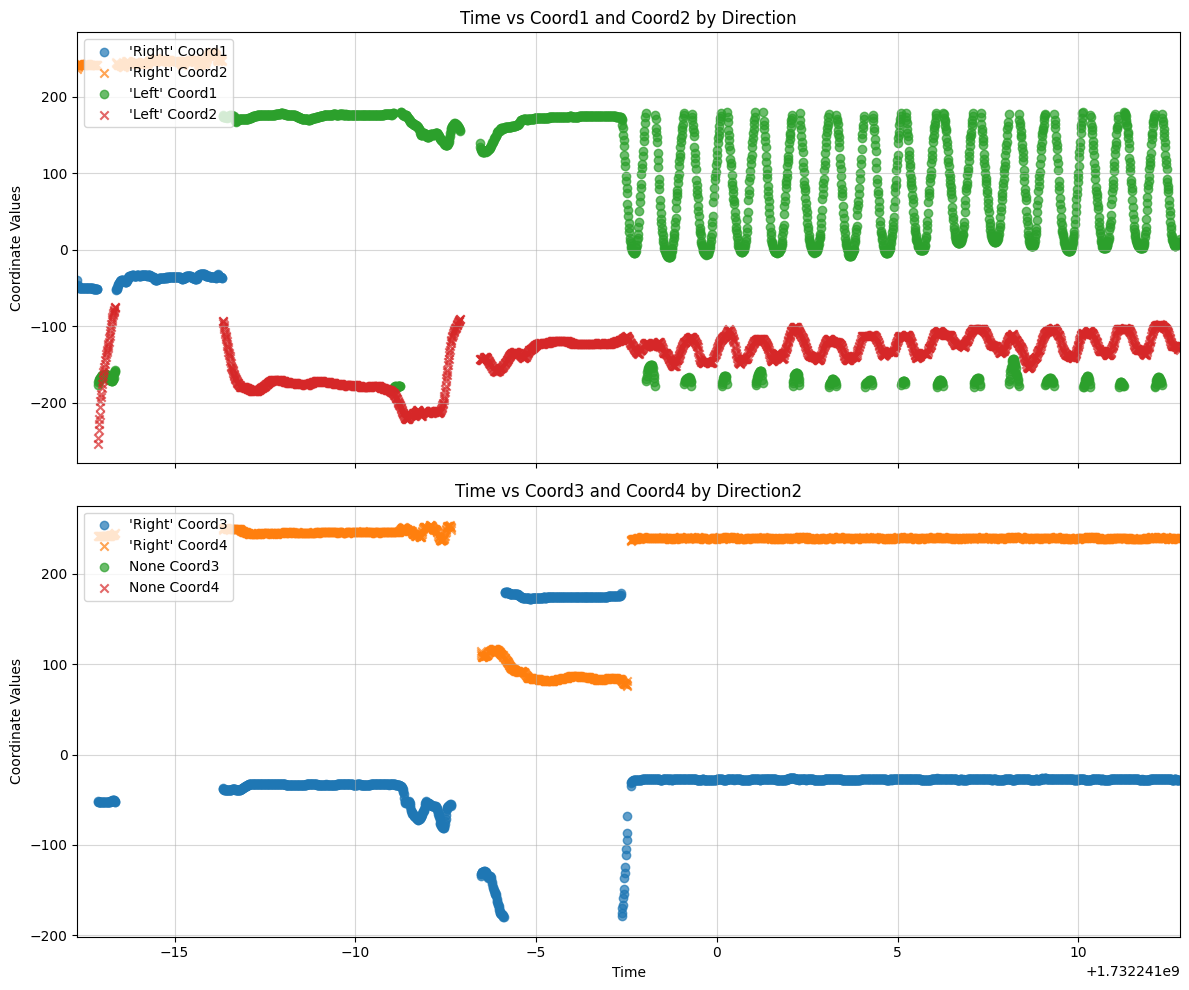

In [7]:
# Unique values for Direction and Direction2
unique_directions = sorted_data.select(pl.col("Direction")).unique()["Direction"].to_list()
unique_directions2 = sorted_data.select(pl.col("Direction2")).unique()["Direction2"].to_list()

# Create the figure and subplots
fig, axes = plt.subplots(2, 1, figsize=(12, 10), sharex=True)

if combined_data['Time'].min() > 1e9:
    print("Time values are large positive numbers. Consider adjusting axis limits.")

# Plot Coord1 and Coord2 by Direction (first subplot)
ax1 = axes[0]
for direction in unique_directions:
    # Filter data by direction
    directional_data = sorted_data.filter(pl.col("Direction") == direction)
    
    # Extract relevant data
    time_values = directional_data["Time"].to_list()
    coord1_values = directional_data["Coord1"].to_list()
    coord2_values = directional_data["Coord2"].to_list()
    
    # Plot Coord1 and Coord2
    ax1.scatter(time_values, coord1_values, label=f"{direction} Coord1", alpha=0.7, marker="o")
    ax1.scatter(time_values, coord2_values, label=f"{direction} Coord2", alpha=0.7, marker="x")

ax1.set_xlim(0, combined_data['Time'].max())
ax1.set_ylabel("Coordinate Values")
ax1.set_title("Time vs Coord1 and Coord2 by Direction")
ax1.legend(loc="upper left")
ax1.grid(alpha=0.5)

# Plot Coord3 and Coord4 by Direction2 (second subplot)
ax2 = axes[1]
for direction in unique_directions2:
    # Filter data by direction2
    directional_data2 = sorted_data.filter(pl.col("Direction2") == direction)
    
    # Extract relevant data
    time_values = directional_data2["Time"].to_list()
    coord3_values = directional_data2["Coord3"].to_list()
    coord4_values = directional_data2["Coord4"].to_list()
    
    # Plot Coord3 and Coord4
    ax2.scatter(time_values, coord3_values, label=f"{direction} Coord3", alpha=0.7, marker="o")
    ax2.scatter(time_values, coord4_values, label=f"{direction} Coord4", alpha=0.7, marker="x")

ax2.set_xlim(0, combined_data['Time'].max())
ax2.set_xlabel("Time")
ax2.set_ylabel("Coordinate Values")
ax2.set_title("Time vs Coord3 and Coord4 by Direction2")
ax2.legend(loc="upper left")
ax2.grid(alpha=0.5)

ax1.set_xlim(combined_data['Time'].min(), combined_data['Time'].max()) #Set x-axis to the minimum and maximum value of the time column
ax2.set_xlim(combined_data['Time'].min(), combined_data['Time'].max())

# Adjust layout and display
plt.tight_layout()
plt.show()
